<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team
    
    
____


### Full Name : Amirreza Bagheri Delouee - Dorsa Majdi
### Student Number : 98109804 - 98102227
___

# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data.
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns)
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# TODO
!mkdir -p resources
%cd ./resources
!gdown 1AZk5UZiO1BPEyi2xC6HZFPePExNdJ_Df
%cd ..

/content/resources
Downloading...
From: https://drive.google.com/uc?id=1AZk5UZiO1BPEyi2xC6HZFPePExNdJ_Df
To: /content/resources/METABRIC_RNA_Mutation.csv
100% 8.39M/8.39M [00:00<00:00, 119MB/s]
/content


In [ ]:
df = pd.read_csv('resources/METABRIC_RNA_Mutation.csv')
print(df.shape)
df.head()

(1904, 693)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
clinical_df = df[df.columns[:31]]
gene_exp_df = df[set(df.columns[31:]) - set(df.filter(regex='_mut').columns)]
gene_mut_df = df.filter(regex='_mut')

In [ ]:
clinical_df.drop('death_from_cancer', axis=1, inplace=True)
print(clinical_df.shape)
clinical_df.head()

(1904, 30)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0


In [ ]:
print(gene_exp_df.shape)
gene_exp_df.head()

(1904, 489)


,ppp2r2a,ccnb1,rad51c,map3k5,aph1a,ccnd3,sik2,nek1,herc2,runx1,...,kdm3a,hsd17b12,nr2f1,sf3b1,acvr1,hif1a,mapk12,taf4b,casp3,hla-g
0,1.3159,-1.6635,-0.6508,1.1210,0.0020,0.2307,5.7407,-0.7678,0.0066,-1.9710,...,-0.6926,1.7409,0.9129,0.0103,0.4710,0.4191,-0.4231,-0.4821,-2.1257,0.1048
1,0.8355,-0.2715,-0.4018,0.4997,1.3135,-0.9088,-1.9196,0.2494,-1.7101,0.6746,...,1.3896,0.0117,-0.4449,2.5210,0.8386,-0.8038,-0.3840,0.2932,0.5775,-0.9355
2,-1.5965,0.6967,-0.0391,0.1242,3.1331,-2.6859,0.0909,3.0991,-2.9315,-1.0401,...,2.6560,0.8981,2.0438,-0.6588,2.2031,3.5336,-0.4056,0.7701,-0.9291,1.9768
3,-1.0110,1.8801,-0.3098,-0.3292,2.3645,-0.6588,-0.3750,1.6192,-2.4937,-0.8902,...,1.4758,-0.6707,-0.8912,-0.6197,1.0455,3.3403,0.2475,3.1831,0.5207,2.0772
4,-2.5448,0.2862,-0.2652,-0.3605,0.1228,1.1366,-0.3797,-1.8565,-1.2114,-2.0765,...,0.5260,-0.7074,-0.4462,1.0402,-0.7534,1.3211,0.3536,-0.5795,-0.5207,0.0246


In [ ]:
print(gene_mut_df.shape)
gene_mut_df.head()

(1904, 173)


,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
unwanted_cols = list(gene_mut_df.columns)
unwanted_cols.extend(['patient_id', 'death_from_cancer'])
clean_df = df.drop(unwanted_cols, axis=1)
print(clean_df.shape)
clean_df.head()

(1904, 518)


,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


## EDA

For each dataset, you must perform a sufficient EDA.

### Clinical Dataset

In [ ]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [ ]:
clinical_df.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,1904.000000,1904.000000,1884.000000,1403.000000
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,0.420693,0.597164,26.238726,1.750535
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,0.493800,0.490597,15.160976,0.628999
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,0.000000,0.000000,17.000000,1.000000
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,0.000000,1.000000,23.000000,2.000000
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,1.000000,1.000000,30.000000,2.000000
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000


Data frame missing entries.


In [ ]:
total_missing = clinical_df.isnull().sum().sort_values(ascending = False)
percent_missing = (clinical_df.isnull().sum() / clinical_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data

,Total_NaN,Percent_Nan
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
cancer_type_detailed,15,0.007878


In [ ]:
def to_standard (df):
    num_df = df[df.select_dtypes(include = np.number).columns.tolist()]

    standard_scaler = StandardScaler()
    standard = standard_scaler.fit_transform(num_df)

    standard_df = pd.DataFrame(standard, index = num_df.index, columns = num_df.columns)
    return standard_df

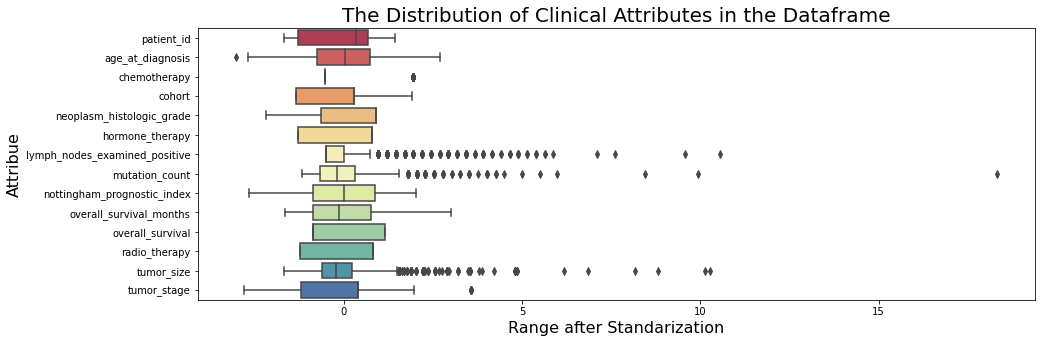

In [ ]:
ax, fig = plt.subplots(1, 1, figsize = (15, 5))
plt.title('The Distribution of Clinical Attributes in the Dataframe', fontsize = 20)

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(clinical_df)), palette = 'Spectral')
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Attribue', size = 16)

plt.show()

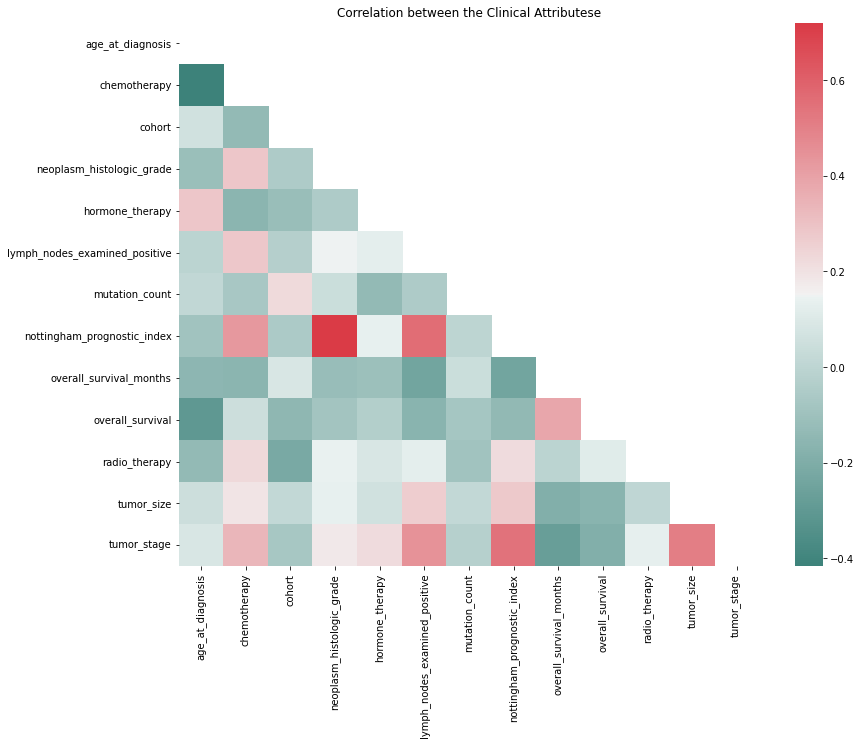

In [ ]:
fig, axs = plt.subplots(figsize = (13, 10))

mask = np.triu(np.ones_like(clinical_df.drop('patient_id', axis=1).corr(), dtype = bool))
sns.heatmap(clinical_df.drop('patient_id', axis=1).corr(), ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation between the Clinical Attributese')

plt.show()

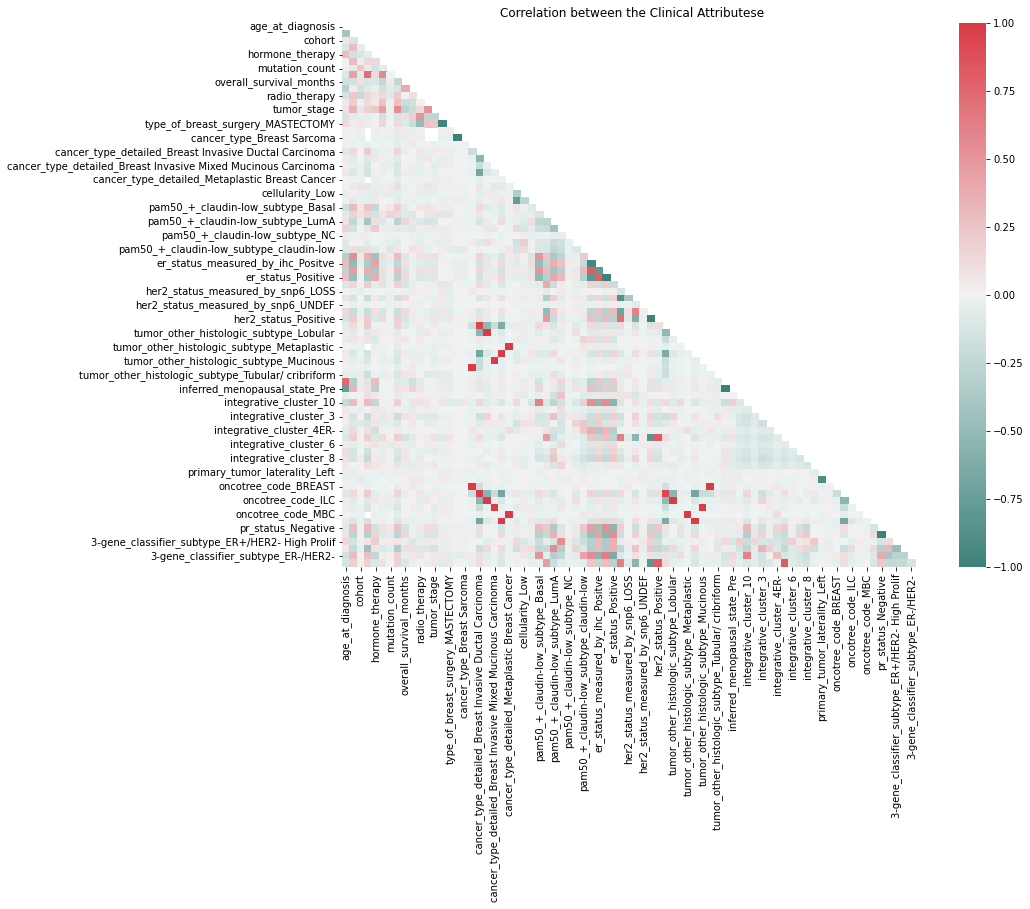

In [ ]:
fig, axs = plt.subplots(figsize = (13, 10))

categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [x for x in categorical_columns if x not in unwanted_columns]

no_id_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns)

mask = np.triu(np.ones_like(no_id_clinical_df.corr(), dtype = bool))
sns.heatmap(no_id_clinical_df.corr(), ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation between the Clinical Attributese')

plt.show()

In [ ]:
# make all values numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
clinical_df = clinical_df.apply(lambda x: le.fit_transform(x) if x.dtype == "object" else x)
clinical_df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,0,75.65,1,0,1,3,0,6,1.0,1,...,NaN,6.044,1,140.500000,1,0,1,2,22.0,2.0
1,2,43.19,0,0,1,0,0,2,1.0,1,...,2.0,4.020,1,84.633333,1,1,1,0,10.0,1.0
2,5,48.87,1,0,1,0,1,3,1.0,1,...,2.0,4.030,1,163.700000,0,1,0,4,15.0,2.0
3,6,47.68,1,0,4,2,1,3,1.0,1,...,1.0,4.050,5,164.933333,1,1,1,4,25.0,2.0
4,8,76.97,1,0,4,0,1,3,1.0,1,...,2.0,6.080,5,41.366667,0,1,1,0,40.0,2.0


In [ ]:
# fill nan
clinical_df = clinical_df.apply(lambda x: x.fillna(x.mean()))
clinical_df.drop(['patient_id', 'overall_survival'], axis=1, inplace = True)
clinical_df

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,75.65,1,0,1,3,0,6,1.0,1,1,...,10.0,5.697687,6.044,1,140.500000,0,1,2,22.0,2.000000
1,43.19,0,0,1,0,0,2,1.0,1,1,...,0.0,2.000000,4.020,1,84.633333,1,1,0,10.0,1.000000
2,48.87,1,0,1,0,1,3,1.0,1,1,...,1.0,2.000000,4.030,1,163.700000,1,0,4,15.0,2.000000
3,47.68,1,0,4,2,1,3,1.0,1,1,...,3.0,1.000000,4.050,5,164.933333,1,1,4,25.0,2.000000
4,76.97,1,0,4,0,1,3,1.0,1,1,...,8.0,2.000000,6.080,5,41.366667,1,1,0,40.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43.10,0,0,2,0,0,2,4.0,1,1,...,1.0,4.000000,5.050,2,196.866667,1,1,1,25.0,1.750535
1900,42.88,1,0,1,0,0,3,4.0,1,1,...,1.0,6.000000,5.040,1,44.733333,0,1,4,20.0,1.750535
1901,62.90,1,0,1,0,0,3,4.0,1,1,...,45.0,4.000000,6.050,1,175.966667,1,1,4,25.0,1.750535
1902,61.16,1,0,1,2,0,3,4.0,1,1,...,12.0,15.000000,5.050,1,86.233333,1,0,0,25.0,1.750535


In [ ]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                1904 non-null   float64
 1   type_of_breast_surgery          1904 non-null   int64  
 2   cancer_type                     1904 non-null   int64  
 3   cancer_type_detailed            1904 non-null   int64  
 4   cellularity                     1904 non-null   int64  
 5   chemotherapy                    1904 non-null   int64  
 6   pam50_+_claudin-low_subtype     1904 non-null   int64  
 7   cohort                          1904 non-null   float64
 8   er_status_measured_by_ihc       1904 non-null   int64  
 9   er_status                       1904 non-null   int64  
 10  neoplasm_histologic_grade       1904 non-null   float64
 11  her2_status_measured_by_snp6    1904 non-null   int64  
 12  her2_status                     19

### Gene Expressions Dataset

In [ ]:
gene_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 489 entries, ppp2r2a to hla-g
dtypes: float64(489)
memory usage: 7.1 MB


In [ ]:
gene_exp_df.describe()

,ppp2r2a,ccnb1,rad51c,map3k5,aph1a,ccnd3,sik2,nek1,herc2,runx1,...,kdm3a,hsd17b12,nr2f1,sf3b1,acvr1,hif1a,mapk12,taf4b,casp3,hla-g
count,1904.000000,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03
mean,0.000001,3.676471e-07,0.000002,3.676471e-07,-5.252101e-08,-8.403361e-07,9.453782e-07,3.676471e-07,-2.100840e-07,-5.252101e-08,...,-1.575630e-07,-5.252101e-08,-3.151261e-07,-6.827731e-07,5.777311e-07,1.050420e-07,6.827731e-07,3.151261e-07,7.352941e-07,5.777311e-07
std,1.000262,1.000263e+00,1.000263,1.000263e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000261e+00,1.000263e+00,1.000263e+00,...,1.000264e+00,1.000262e+00,1.000264e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00,1.000262e+00
min,-4.787000,-2.213500e+00,-3.256700,-2.750100e+00,-2.270600e+00,-3.399000e+00,-3.604000e+00,-3.610800e+00,-3.171600e+00,-4.977000e+00,...,-3.132900e+00,-5.503100e+00,-1.979300e+00,-3.371700e+00,-3.637700e+00,-2.266900e+00,-2.389900e+00,-2.000600e+00,-3.636100e+00,-2.023200e+00
25%,-0.662450,-7.259500e-01,-0.616350,-7.008250e-01,-6.988000e-01,-6.604000e-01,-6.483000e-01,-6.815500e-01,-6.184750e-01,-6.162750e-01,...,-6.797750e-01,-5.824250e-01,-6.831250e-01,-6.629000e-01,-6.332000e-01,-7.494250e-01,-6.843250e-01,-5.755250e-01,-6.543250e-01,-6.975500e-01
50%,-0.001750,-8.780000e-02,-0.133350,-1.299500e-01,-5.800000e-02,-2.535000e-02,-5.045000e-02,-1.835000e-02,-2.025000e-02,1.700000e-03,...,-2.765000e-02,5.815000e-02,-1.867500e-01,-4.600000e-03,5.370000e-02,-7.415000e-02,-1.592000e-01,-1.568000e-01,-3.830000e-02,-1.593000e-01
75%,0.699025,6.053750e-01,0.493525,5.792250e-01,5.861250e-01,6.196000e-01,5.570500e-01,6.679000e-01,5.779000e-01,6.698250e-01,...,6.209250e-01,6.475500e-01,4.914500e-01,6.735000e-01,6.615500e-01,6.867000e-01,4.335250e-01,3.216000e-01,6.230000e-01,5.161000e-01
max,3.750100,4.556000e+00,4.405400,5.005300e+00,5.237500e+00,4.776400e+00,7.996300e+00,3.810600e+00,4.574400e+00,3.734600e+00,...,5.380300e+00,3.835800e+00,5.140400e+00,2.954100e+00,4.894200e+00,3.665400e+00,5.543900e+00,1.033250e+01,6.023900e+00,6.315800e+00


In [ ]:
total_missing = gene_exp_df.isnull().sum().sort_values(ascending = False)
percent_missing = (gene_exp_df.isnull().sum() / gene_exp_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data

,Total_NaN,Percent_Nan
ppp2r2a,0,0.0
tgfbr3,0,0.0
fanca,0,0.0
cxcr1,0,0.0
pten,0,0.0
...,...,...
bbc3,0,0.0
pdgfb,0,0.0
map3k13,0,0.0
stat3,0,0.0


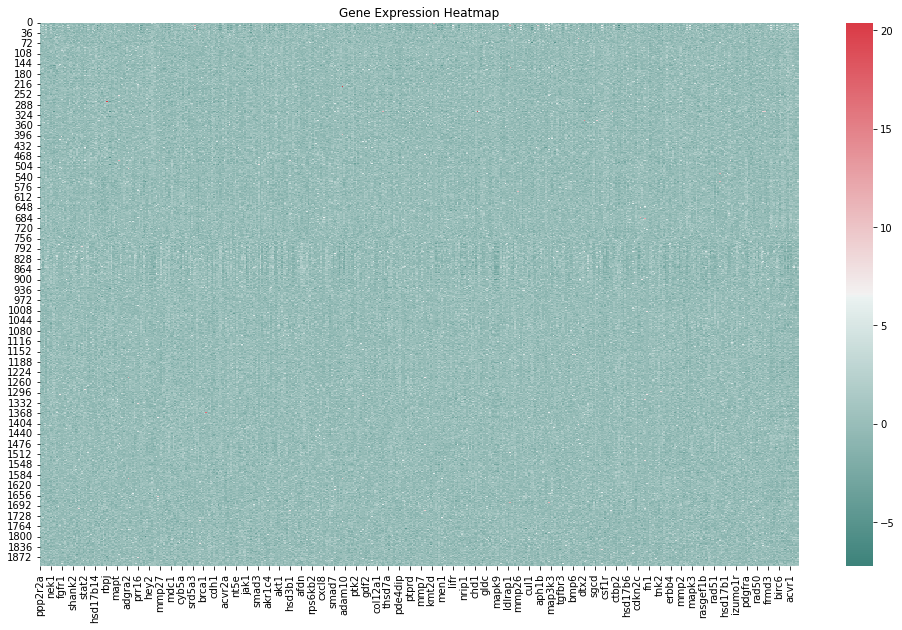

In [ ]:
fig, axs = plt.subplots(figsize = (17, 10))
sns.heatmap(gene_exp_df, ax = axs, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Gene Expression Heatmap')

plt.show()

### Train Test Split

In [ ]:
X = pd.concat([clinical_df, gene_exp_df], axis=1)
y = clean_df['overall_survival']

X_clinical = clinical_df
X_gen = gene_exp_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

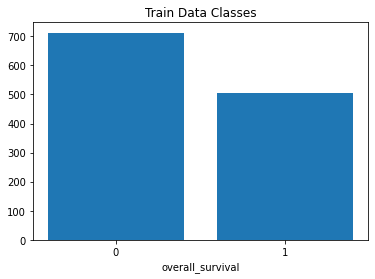

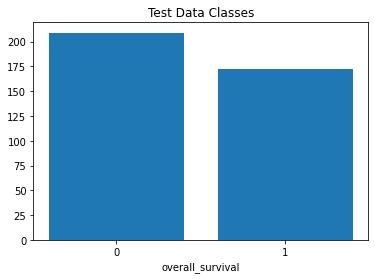

In [ ]:
zero_count = y_train.to_list().count(0)
one_count = y_train.to_list().count(1)
plt.bar([0, 1], [zero_count, one_count], tick_label=['0', '1'])
plt.xlabel('overall_survival')
plt.title('Train Data Classes')
plt.show()

zero_count = y_test.to_list().count(0)
one_count = y_test.to_list().count(1)
plt.bar([0, 1], [zero_count, one_count], tick_label=['0', '1'])
plt.xlabel('overall_survival')
plt.title('Test Data Classes')
plt.show()

In [ ]:
X_train_clinical = X_train[clinical_df.columns]
X_val_clinical = X_val[clinical_df.columns]
X_test_clinical = X_test[clinical_df.columns]

In [ ]:
gene_cols = gene_exp_df.columns
X_train_gene = X_train[gene_cols]
X_val_gene = X_val[gene_cols]
X_test_gene = X_test[gene_cols]

### PCA Visualization

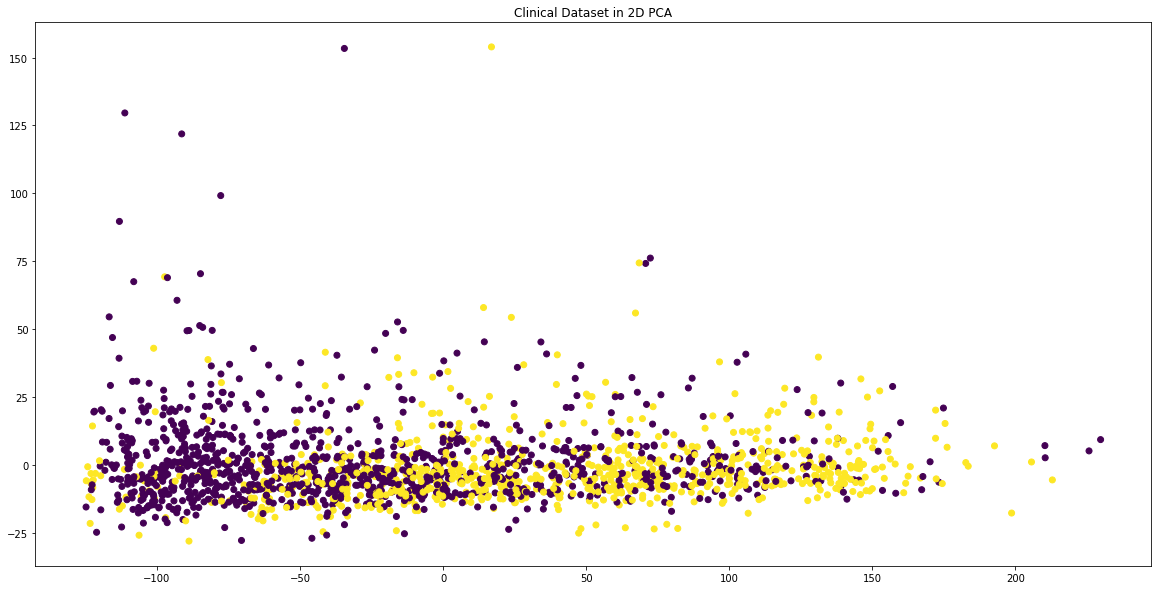

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_clinical)
X_clinical_2d = pca.transform(X_clinical)
plt.figure(figsize = (20,10))
plt.scatter(X_clinical_2d[:, 0], X_clinical_2d[:, 1], c=y)
plt.title('Clinical Dataset in 2D PCA')
plt.show()

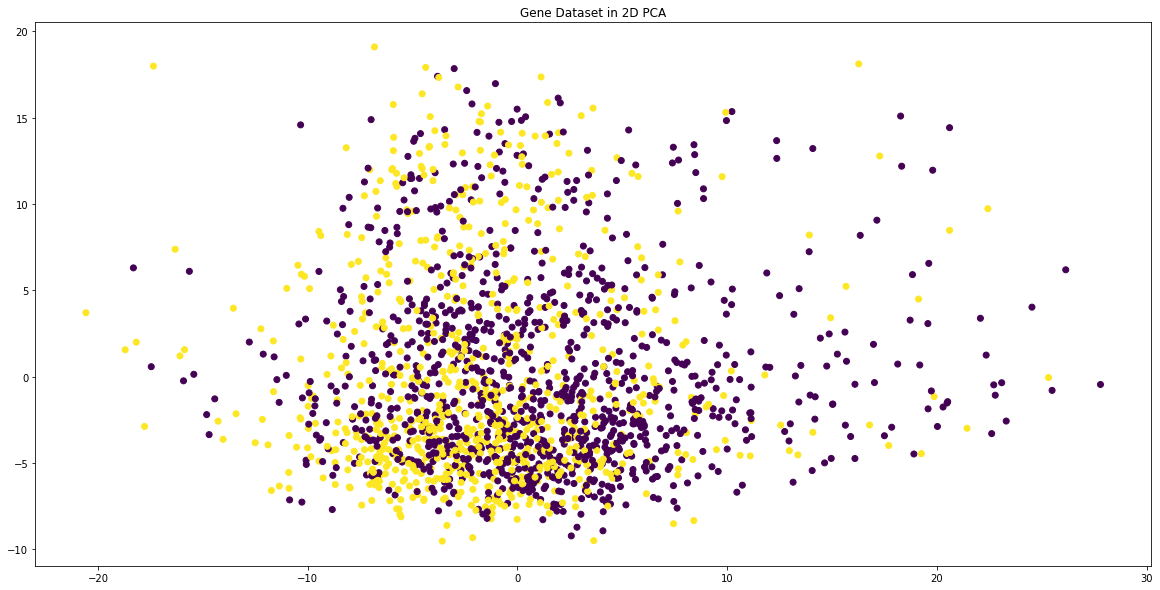

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_gen)
X_gen_2d = pca.transform(X_gen)
plt.figure(figsize = (20,10))
plt.scatter(X_gen_2d[:, 0], X_gen_2d[:, 1], c=y)
plt.title('Gene Dataset in 2D PCA')
plt.show()

### UMAP Visualization

In [ ]:
! pip install umap
! pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import umap.umap_ as umap

reducer = umap.UMAP(n_components=2)
X_clinical_red = reducer.fit_transform(X_clinical)

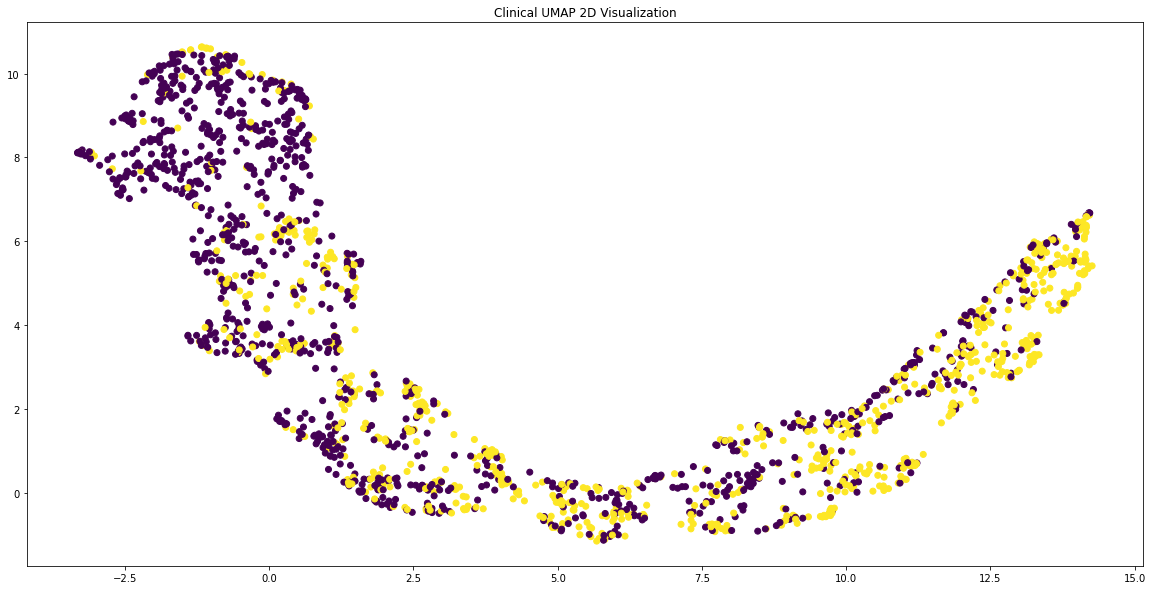

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(X_clinical_red[:,0],X_clinical_red[:,1], c=y)
plt.title('Clinical UMAP 2D Visualization')
plt.show()

In [ ]:
reducer = umap.UMAP(n_components=2)
X_gen_red = reducer.fit_transform(X_gen)

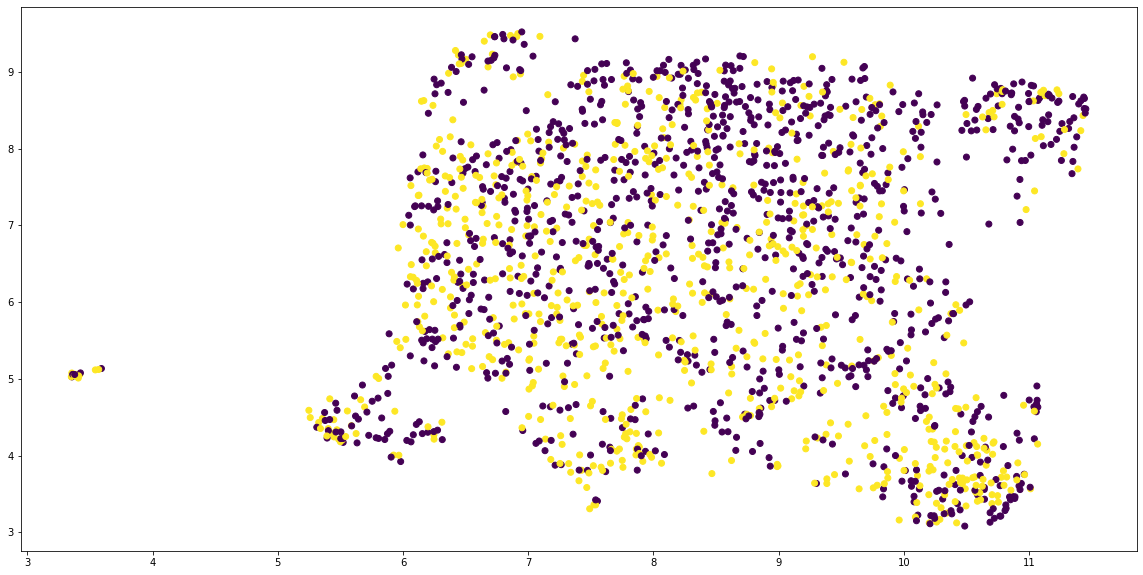

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(X_gen_red[:,0],X_gen_red[:,1], c=y)
plt.show()

# Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

### PCA Feature selection

In [ ]:
pca = PCA(n_components=None)
pca.fit(X_train_gene)
pca.transform(X_train_gene)
importance_scores = pca.explained_variance_ratio_

<BarContainer object of 489 artists>

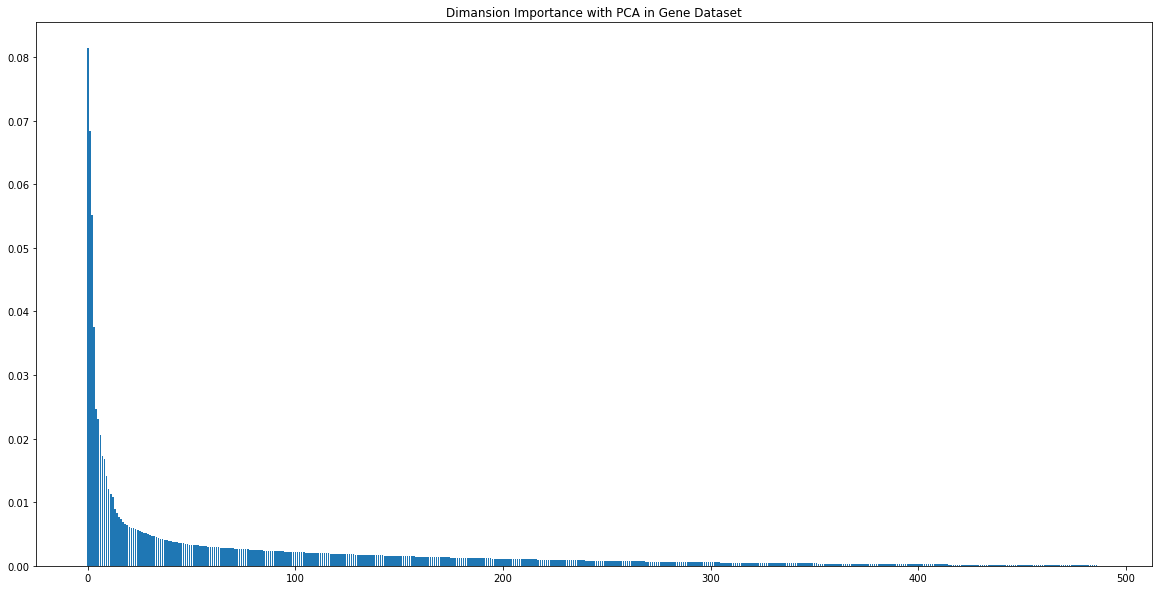

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Dimansion Importance with PCA in Gene Dataset')
plt.bar(range(len(importance_scores)), importance_scores)

In [ ]:
index = -1
sum = 0
for i, val in enumerate(importance_scores):
    sum += val
    if sum >= 0.9:
        index = i
        break
index

230

In [ ]:
pca = PCA(n_components=None)
pca.fit(X_train_clinical)
pca.transform(X_train_clinical)
importance_scores = pca.explained_variance_ratio_

<BarContainer object of 28 artists>

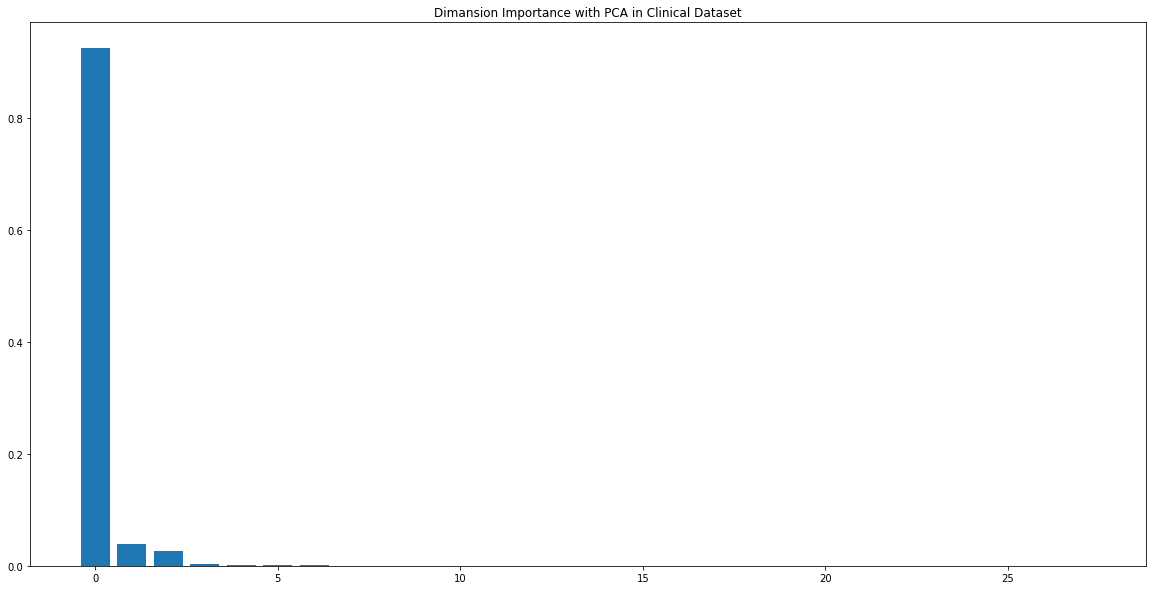

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Dimansion Importance with PCA in Clinical Dataset')
plt.bar(range(len(importance_scores)), importance_scores)

In [ ]:
index = -1
sum = 0
for i, val in enumerate(importance_scores):
    sum += val
    if sum >= 0.95:
        index = i
        break
index

1

### Random forest feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_clinical, y_train)
importances_clinical = clf.feature_importances_

<BarContainer object of 28 artists>

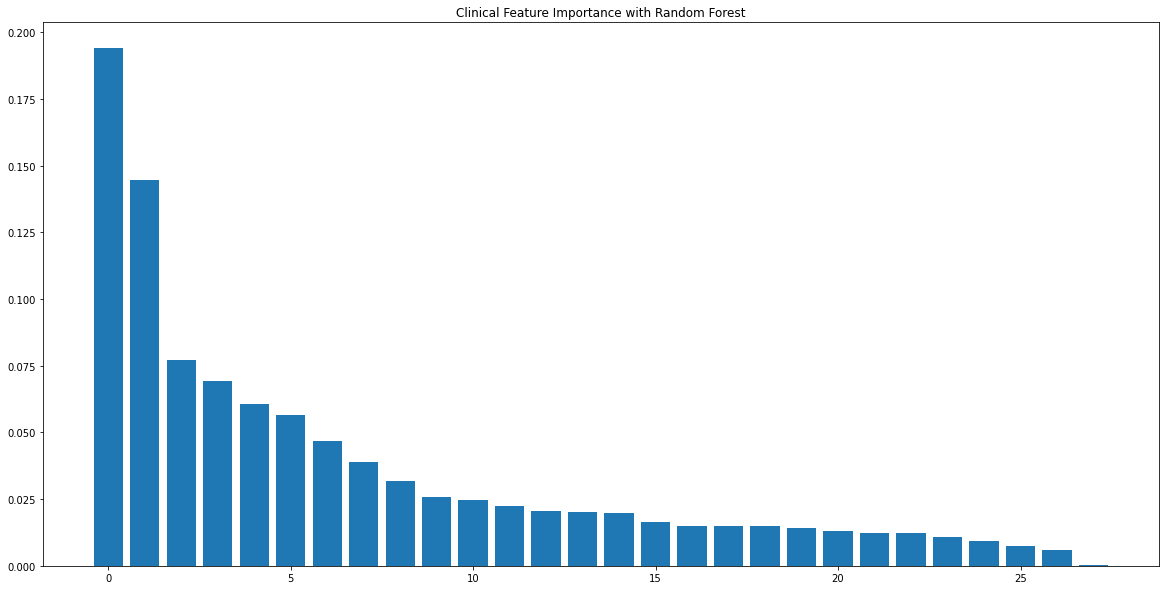

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Clinical Feature Importance with Random Forest')
plt.bar(range(len(importances_clinical)), sorted(importances_clinical, reverse = True))

In [ ]:
index = -1
sum = 0
importatnt_features = []
for i,val in enumerate(sorted(enumerate(importances_clinical), key=lambda x: x[1], reverse = True)):
    sum += val[1]
    importatnt_features.append(val[0])
    if sum >= 0.8:
        index = i
        break
index

12

In [ ]:
clinical_cols = X_clinical.columns.to_list()
print('Most important clinical features:')
[clinical_cols[i] for i in importatnt_features]

Most important clinical features:


['overall_survival_months',
 'age_at_diagnosis',
 'nottingham_prognostic_index',
 'tumor_size',
 'cohort',
 'mutation_count',
 'integrative_cluster',
 'pam50_+_claudin-low_subtype',
 'lymph_nodes_examined_positive',
 '3-gene_classifier_subtype',
 'cellularity',
 'tumor_stage',
 'type_of_breast_surgery']

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_gene, y_train)
importances_gen = clf.feature_importances_

<BarContainer object of 489 artists>

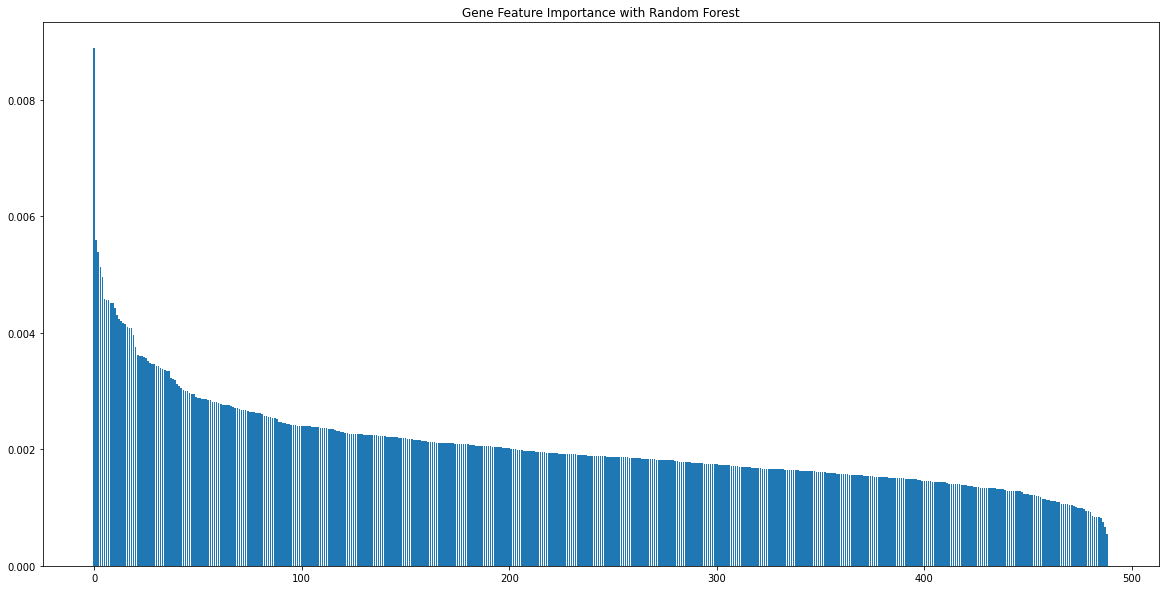

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Gene Feature Importance with Random Forest')
plt.bar(range(len(importances_gen)), sorted(importances_gen, reverse = True))

In [ ]:
index = -1
sum = 0
importatnt_features = []
for i,val in enumerate(sorted(enumerate(importances_gen), key=lambda x: x[1], reverse = True)):
    sum += val[1]
    importatnt_features.append(val[0])
    if sum >= 0.8:
        index = i
        break
index

340

In [ ]:
gen_cols = X_gen.columns.to_list()
print('Most important clinical features:')
[gen_cols[i] for i in importatnt_features]

Most important clinical features:


['flt3',
 'akt1',
 'spry2',
 'mmp25',
 'lama2',
 'runx1',
 'stat5a',
 'hsd17b11',
 'kmt2c',
 'stat5b',
 'hes2',
 'ncoa3',
 'kit',
 'jak1',
 'mmp11',
 'abcb1',
 'cdkn2c',
 'magea8',
 'casp8',
 'tsc2',
 'e2f2',
 'hsd3b1',
 'map4',
 'tgfbr2',
 'arid1a',
 'rps6',
 'rbpjl',
 'smad6',
 'hsd17b13',
 'jak2',
 'cxcr2',
 'maml1',
 'tgfb3',
 'tubb4b',
 'mmp17',
 'npnt',
 'palb2',
 'pdgfb',
 'inhba',
 'itgav',
 'lamb3',
 'smad4',
 'ccnd2',
 'cdk6',
 'wwox',
 'rps6kb2',
 'herc2',
 'ncor2',
 'igf1',
 'abcc1',
 'bmp3',
 'raf1',
 'bmp6',
 'cacna2d3',
 'cir1',
 'smarcd1',
 'e2f6',
 'bad',
 'fgfr1',
 'cxcr1',
 'afdn',
 'mmp2',
 'mlh1',
 'nras',
 'myc',
 'thsd7a',
 'nbn',
 'arid5b',
 'shank2',
 'pdgfra',
 'cdk4',
 'casp10',
 'asxl1',
 'mlst8',
 'mtor',
 'rbl2',
 'ccne1',
 'rbl1',
 'foxo3',
 'brca1',
 'stat2',
 'ccnb1',
 'bcl2',
 'col22a1',
 'rdh5',
 'mapk14',
 'aff2',
 'mapt',
 'rheb',
 'sdc4',
 'taf4b',
 'spaca1',
 'gsk3b',
 'gldc',
 'myh9',
 'izumo1r',
 'mmp19',
 'nr1i2',
 'hsd3b2',
 'e2f3',
 'prkacg',

### RFE feature selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from warnings import simplefilter
simplefilter(action='ignore')

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(X_train_clinical, y_train)
n_features = fit.n_features_
mask = fit.support_
selected_features = X_train_clinical.columns[mask]
print(len(selected_features))
print("Selected Clinical Features:\n", selected_features)

14
Selected Clinical Features:
 Index(['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed',
       'cellularity', 'chemotherapy', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'oncotree_code', 'tumor_stage'],
      dtype='object')


In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(X_train_gene, y_train)
n_features = fit.n_features_
mask = fit.support_
selected_features = X_train_gene.columns[mask]
print(len(selected_features))
print("Selected Features:", selected_features)

244
Selected Features: Index(['rad51c', 'map3k5', 'aph1a', 'sik2', 'runx1', 'arl11', 'maml2', 'fgfr1',
       'mecom', 'rictor',
       ...
       'frmd3', 'map3k10', 'birc6', 'casp10', 'kdm3a', 'sf3b1', 'mapk12',
       'taf4b', 'casp3', 'hla-g'],
      dtype='object', length=244)


### UMAP Reduction

In [ ]:
# Clinical dim reduction
reducer = umap.UMAP(n_neighbors=20, n_components=13, random_state=42)
X_train_clinical_red = reducer.fit_transform(X = X_train_clinical, y = y_train)
X_test_clinical_red = reducer.fit_transform(X= X_test_clinical, y = y_test)

In [ ]:
# Gene dim reduction
reducer = umap.UMAP(n_neighbors=10, n_components=20)
X_train_gene_red = reducer.fit_transform(X_train_gene)
X_test_gene_red = reducer.fit_transform(X_test_gene)

In [ ]:
# Gene dim reduction
pca = PCA(n_components=56)
pca.fit(X_train_gene)
X_train_gene_red = pca.transform(X_train_gene)
X_val_gene_red = pca.transform(X_val_gene)
X_test_gene_red = pca.transform(X_test_gene)

# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

### Clinical Dataset

Best hyperparameters: {'max_depth': None, 'n_estimators': 50}
Train Accuracy:  1.0
Test Accuracy: 0.7664
Test Precision: 0.8320
Test Recall: 0.6047
Test F1 Score: 0.7003


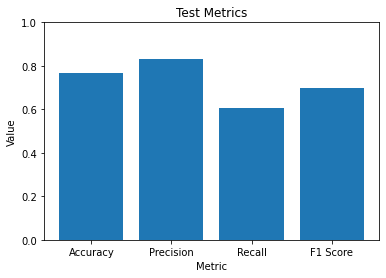

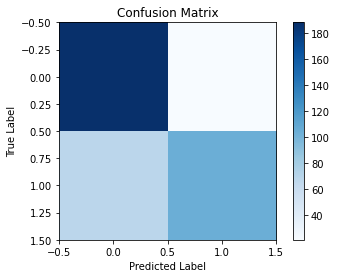

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5, 7, None]}

# Perform hyperparameter optimization
clf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_clinical, y_train)

# Print the best hyperparameters
print("Best hyperparameters: {}".format(grid_search.best_params_))

# Train the Random Forest classifier with the best hyperparameters
clf = grid_search.best_estimator_
clf.fit(X_train_clinical, y_train)
print('Train Accuracy: ', clf.score(X_train_clinical, y_train))

# Test the model on the test data
y_pred_test = clf.predict(X_test_clinical)

# Evaluate the performance on the test data
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print("Test Accuracy: {:.4f}".format(test_acc))
print("Test Precision: {:.4f}".format(test_prec))
print("Test Recall: {:.4f}".format(test_recall))
print("Test F1 Score: {:.4f}".format(test_f1))

# Plot the loss and metrics
metrics = [test_acc, test_prec, test_recall, test_f1]
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.bar(metric_labels, metrics)
plt.ylim([0, 1])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Test Metrics')
plt.show()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Gene expresions Dataset

Best hyperparameters: {'max_depth': 9, 'n_estimators': 100}
Train Accuracy:  0.9991789819376026
Test Accuracy: 0.6037
Test Precision: 0.6400
Test Recall: 0.2791
Test F1 Score: 0.3887


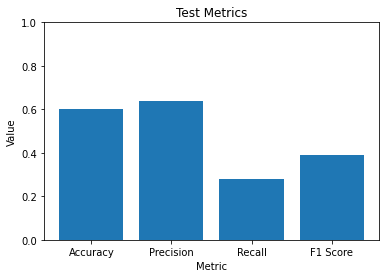

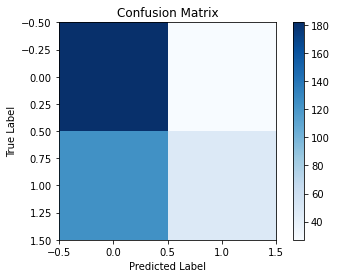

In [ ]:
# Define the hyperparameter grid
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 7, 9, None]}

# Perform hyperparameter optimization
clf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_gene, y_train)

# Print the best hyperparameters
print("Best hyperparameters: {}".format(grid_search.best_params_))

# Train the Random Forest classifier with the best hyperparameters
clf = grid_search.best_estimator_
clf.fit(X_train_gene, y_train)
print('Train Accuracy: ', clf.score(X_train_gene, y_train))


# Test the model on the test data
y_pred_test = clf.predict(X_test_gene)

# Evaluate the performance on the test data
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print("Test Accuracy: {:.4f}".format(test_acc))
print("Test Precision: {:.4f}".format(test_prec))
print("Test Recall: {:.4f}".format(test_recall))
print("Test F1 Score: {:.4f}".format(test_f1))

# Plot the loss and metrics
metrics = [test_acc, test_prec, test_recall, test_f1]
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.bar(metric_labels, metrics)
plt.ylim([0, 1])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Test Metrics')
plt.show()
print()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Best hyperparameters: {'max_depth': None, 'n_estimators': 100}
Train Accuracy:  1.0
Test Accuracy: 0.6010
Test Precision: 0.6190
Test Recall: 0.3023
Test F1 Score: 0.4062


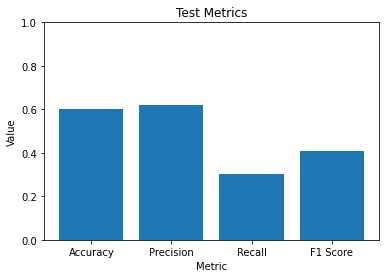

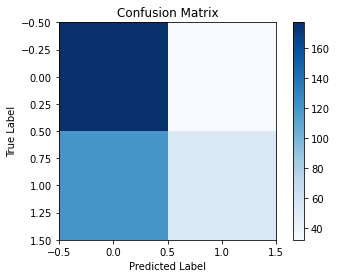

In [ ]:
#Define the hyperparameter grid
param_grid = {'n_estimators': [100, 200, 250], 'max_depth': [3, 5, 7, None]}

# Perform hyperparameter optimization
clf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_gene_red, y_train)

# Print the best hyperparameters
print("Best hyperparameters: {}".format(grid_search.best_params_))

# Train the Random Forest classifier with the best hyperparameters
clf = grid_search.best_estimator_
clf.fit(X_train_gene_red, y_train)
print('Train Accuracy: ', clf.score(X_train_gene_red, y_train))

# Test the model on the test data
y_pred_test = clf.predict(X_test_gene_red)

# Evaluate the performance on the test data
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print("Test Accuracy: {:.4f}".format(test_acc))
print("Test Precision: {:.4f}".format(test_prec))
print("Test Recall: {:.4f}".format(test_recall))
print("Test F1 Score: {:.4f}".format(test_f1))

# Plot the loss and metrics
metrics = [test_acc, test_prec, test_recall, test_f1]
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.bar(metric_labels, metrics)
plt.ylim([0, 1])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Test Metrics')
plt.show()
print()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

### Imports

In [ ]:
import keras
from keras import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.constraints import MaxNorm
from keras.regularizers import l2


from sklearn.neural_network import MLPClassifier

In [ ]:
def std_scale(X_train, X_val, X_test):
    sc = StandardScaler()
    scaler = sc.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_val_scaled, X_test_scaled

In [ ]:
def show_loss_history(model):
    model_hist = model.history.history
    train_losses = model_hist['loss']
    val_losses = model_hist['val_loss']

    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title("Loss vs. Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [ ]:
def show_acc_result(model, X_train, X_test, y_train, y_test):
    y_pred_train = np.round(model.predict(X_train).flatten())
    y_pred_test = np.round(model.predict(X_test).flatten())

    print(f"Accuracy for Train: {accuracy_score(y_train, y_pred_train):.2f}")
    print(f"Accuracy for Test: {accuracy_score(y_test, y_pred_test):.2f}")

    """plot_confusion_matrix(model, X_test_clinical_std, y_test, display_labels=[0, 1])
    plt.show()"""

In [ ]:
def simple_mlp_model(X_train):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer="adam",
    )
    return model

In [ ]:
def complex_mlp_model(X_train):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer="he_normal", activation="relu"))
    model.add(Dense(64, kernel_initializer="he_normal", activation="relu"))
    model.add(Dense(32, kernel_initializer="he_normal", activation="relu"))
    model.add(Dense(16, kernel_initializer="he_normal", activation="relu"))
    model.add(Dense(4, kernel_initializer="he_normal", activation="relu"))
    model.add(Dense(1, kernel_initializer="he_normal", activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer="adam"
    )
    return model

In [ ]:
def constrained_mlp_model(X_train):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer="he_normal", activation="relu", kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer="he_normal", activation="relu", kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_initializer="he_normal", activation="relu", kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(16, kernel_initializer="he_normal", activation="relu", kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(4, kernel_initializer="he_normal", activation="relu", kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer="he_normal", activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer="adam"
    )
    return model

In [ ]:
def regularized_mlp_model(X_train):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1],
                            kernel_initializer="he_normal",
                            activation="relu",
                            kernel_constraint=MaxNorm(3),
                            kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_initializer="he_normal",
                        activation="relu",
                        kernel_constraint=MaxNorm(3),
                        kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(8, kernel_initializer="he_normal",
                        activation="relu",
                        kernel_constraint=MaxNorm(3),
                        kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer="he_normal",
                        activation="sigmoid",
                        kernel_constraint=MaxNorm(3),
                        kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.compile(
        loss="binary_crossentropy",
        optimizer="adam"
    )
    return model

### Clinical Dataset

In [ ]:
X_train_clinical_std, X_val_clinical_std, X_test_clinical_std = std_scale(X_train=X_train_clinical,
                                                                            X_val=X_val_clinical,
                                                                            X_test=X_test_clinical)

#### 1. MLPClassifier

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                        max_iter=300,
                        activation='relu',
                        solver='adam')

mlp_clf.fit(X_train_clinical_std, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

Accuracy for Train: 1.00
Accuracy for Test: 0.72


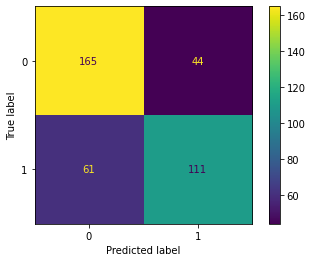

In [ ]:
y_pred_train = mlp_clf.predict(X_train_clinical_std)
y_pred_test = mlp_clf.predict(X_test_clinical_std)

print(f"Accuracy for Train: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Accuracy for Test: {accuracy_score(y_test, y_pred_test):.2f}")

plot_confusion_matrix(mlp_clf, X_test_clinical_std, y_test, display_labels=mlp_clf.classes_)
plt.show()

#### 2. Simple MLP

In [ ]:
model = simple_mlp_model(X_train_clinical_std)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 32)                928       
                                                                 
 dense_51 (Dense)            (None, 1)                 33        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_clinical_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_clinical_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 6ms/step - loss: 0.6872 - val_loss: 0.5909
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6310 - val_loss: 0.5601
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5985 - val_loss: 0.5403
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5761 - val_loss: 0.5265
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5598 - val_loss: 0.5228
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5475 - val_loss: 0.5147
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5373 - val_loss: 0.5106
Epoch 8/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5295 - val_loss: 0.5107
Epoch 9/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5233 - val_loss: 0.5053
Epoch 10/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5169 - val_loss: 0.5023
Epoch 11/

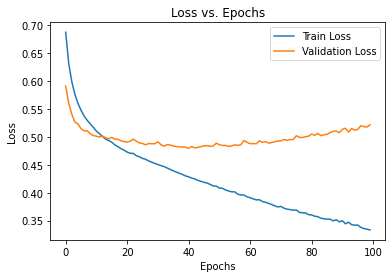

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_clinical_std,
                X_test=X_test_clinical_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 0.86
Accuracy for Test: 0.76


#### 3. Complex Model

In [ ]:
model = complex_mlp_model(X_train_clinical)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               3712      
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 16)                528       
                                                                 
 dense_56 (Dense)            (None, 4)                 68        
                                                                 
 dense_57 (Dense)            (None, 1)                 5         
                                                                 
Total params: 14,649
Trainable params: 14,649
Non-tra

In [ ]:
model.fit(X_train_clinical_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_clinical_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 13ms/step - loss: 0.6827 - val_loss: 0.5861
Epoch 2/100
39/39 [==============================] - 0s 6ms/step - loss: 0.5820 - val_loss: 0.5586
Epoch 3/100
39/39 [==============================] - 0s 6ms/step - loss: 0.5256 - val_loss: 0.5333
Epoch 4/100
39/39 [==============================] - 0s 8ms/step - loss: 0.4812 - val_loss: 0.5276
Epoch 5/100
39/39 [==============================] - 0s 6ms/step - loss: 0.4463 - val_loss: 0.5295
Epoch 6/100
39/39 [==============================] - 0s 7ms/step - loss: 0.4230 - val_loss: 0.5494
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3826 - val_loss: 0.5422
Epoch 8/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3460 - val_loss: 0.5677
Epoch 9/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3189 - val_loss: 0.5735
Epoch 10/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2863 - val_loss: 0.5772
Epoch 11

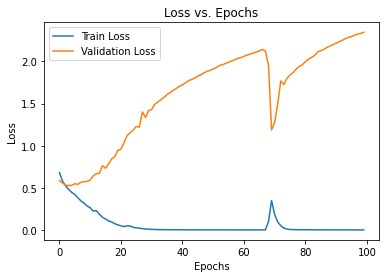

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_clinical_std,
                X_test=X_test_clinical_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.73


#### 4. Constrained MLP

In [ ]:
model = constrained_mlp_model(X_train_clinical_std)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 128)               3712      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 64)                8256      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_61 (Dense)            (None, 16)              

In [ ]:
model.fit(X_train_clinical_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_clinical_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 9ms/step - loss: 0.8461 - val_loss: 0.6893
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6947 - val_loss: 0.6879
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6996 - val_loss: 0.6826
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6754 - val_loss: 0.6660
Epoch 5/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6670 - val_loss: 0.6504
Epoch 6/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6594 - val_loss: 0.6189
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6533 - val_loss: 0.6205
Epoch 8/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6395 - val_loss: 0.6197
Epoch 9/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6488 - val_loss: 0.6175
Epoch 10/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6337 - val_loss: 0.5926
Epoch 11/

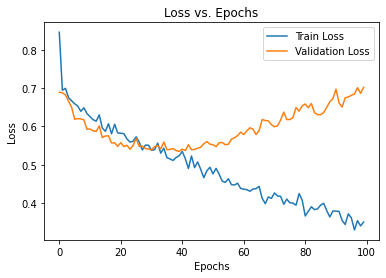

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_clinical_std,
                X_test=X_test_clinical_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 0.91
Accuracy for Test: 0.75


#### 5. Regularized MLP

In [ ]:
model = regularized_mlp_model(X_train_clinical_std)
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 128)               3712      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_65 (Dense)            (None, 32)                4128      
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_66 (Dense)            (None, 8)                 264       
                                                                 
 dropout_23 (Dropout)        (None, 8)                 0         
                                                                 
 dense_67 (Dense)            (None, 1)               

In [ ]:
model.fit(X_train_clinical_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_clinical_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 8ms/step - loss: 3.8657 - val_loss: 3.5134
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 3.3183 - val_loss: 3.0476
Epoch 3/100
39/39 [==============================] - 0s 4ms/step - loss: 2.8768 - val_loss: 2.6403
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 2.4858 - val_loss: 2.2807
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 2.1736 - val_loss: 1.9727
Epoch 6/100
39/39 [==============================] - 0s 4ms/step - loss: 1.8906 - val_loss: 1.7145
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 1.6648 - val_loss: 1.5054
Epoch 8/100
39/39 [==============================] - 0s 4ms/step - loss: 1.4672 - val_loss: 1.3425
Epoch 9/100
39/39 [==============================] - 0s 3ms/step - loss: 1.3243 - val_loss: 1.2065
Epoch 10/100
39/39 [==============================] - 0s 3ms/step - loss: 1.1906 - val_loss: 1.0909
Epoch 11/

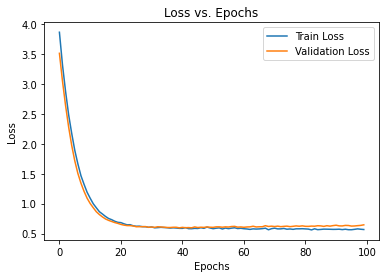

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_clinical_std,
                X_test=X_test_clinical_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 0.84
Accuracy for Test: 0.76


#### 6. Autoencoder

In [ ]:
input_dim = Input(shape=(X_train_clinical_std.shape[1], ))
encoded = Dense(16, activation='relu')(input_dim)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4)(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(X_train_clinical_std.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_dim, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_68 (Dense)            (None, 16)                464       
                                                                 
 dense_69 (Dense)            (None, 8)                 136       
                                                                 
 dense_70 (Dense)            (None, 4)                 36        
                                                                 
 dense_71 (Dense)            (None, 8)                 40        
                                                                 
 dense_72 (Dense)            (None, 16)                144       
                                                                 
 dense_73 (Dense)            (None, 28)                476 

In [ ]:
autoencoder.fit(X_train_clinical_std, X_train_clinical_std,
                epochs = 100,
                batch_size = 16,
                shuffle = True,
                validation_data = (X_val_clinical_std, X_val_clinical_std))

encoder = Model(input_dim, encoded)

Epoch 1/100
77/77 [==============================] - 1s 5ms/step - loss: 1.1967 - val_loss: 1.1145
Epoch 2/100
77/77 [==============================] - 0s 3ms/step - loss: 1.0434 - val_loss: 0.9721
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 0.9508 - val_loss: 0.9088
Epoch 4/100
77/77 [==============================] - 0s 3ms/step - loss: 0.9046 - val_loss: 0.8799
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8792 - val_loss: 0.8641
Epoch 6/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8641 - val_loss: 0.8520
Epoch 7/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8529 - val_loss: 0.8449
Epoch 8/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8447 - val_loss: 0.8381
Epoch 9/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8387 - val_loss: 0.8339
Epoch 10/100
77/77 [==============================] - 0s 3ms/step - loss: 0.8337 - val_loss: 0.8304
Epoch 11/

In [ ]:
X_train_nonLinear_features = encoder.predict(X_train_clinical_std)
X_test_nonLinear_features = encoder.predict(X_test_clinical_std)

X_train_auto = np.concatenate((X_train_clinical_std, X_train_nonLinear_features), axis=1)
X_test_auto = np.concatenate((X_test_clinical_std, X_test_nonLinear_features), axis=1)

12/12 [==============================] - 0s 2ms/step


In [ ]:
auto_model = Sequential()

auto_model.add(Dense(1, input_dim=X_train_auto.shape[1], activation='sigmoid'))
auto_model.compile(loss='binary_crossentropy', optimizer='adam')
auto_model.fit(X_train_auto, y_train,
                epochs=100,
                batch_size = 32,
                shuffle = True)

Epoch 1/100
39/39 [==============================] - 0s 2ms/step - loss: 1.8998
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 1.4888
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 1.1543
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: 0.9088
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 0.7805
Epoch 6/100
39/39 [==============================] - 0s 1ms/step - loss: 0.7130
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 0.6814
Epoch 8/100
39/39 [==============================] - 0s 2ms/step - loss: 0.6599
Epoch 9/100
39/39 [==============================] - 0s 2ms/step - loss: 0.6448
Epoch 10/100
39/39 [==============================] - 0s 2ms/step - loss: 0.6331
Epoch 11/100
39/39 [==============================] - 0s 2ms/step - loss: 0.6229
Epoch 12/100
39/39 [==============================] - 0s 2ms/step - loss: 0.6134
Epoch 13/100
39/39 [=================

In [ ]:
show_acc_result(model=auto_model,
                X_train=X_train_auto,
                X_test=X_test_auto,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 0.72
Accuracy for Test: 0.77


### Gene Expressions Dataset

In [ ]:
X_train_gene_std, X_val_gene_std, X_test_gene_std = std_scale(X_train=X_train_gene,
                                                                X_val=X_val_gene,
                                                                X_test=X_test_gene)

#### 1. MLPClassifier

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                        max_iter=300,
                        activation='relu',
                        solver='adam')

mlp_clf.fit(X_train_gene_std, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

Accuracy for Train: 1.00
Accuracy for Test: 0.60


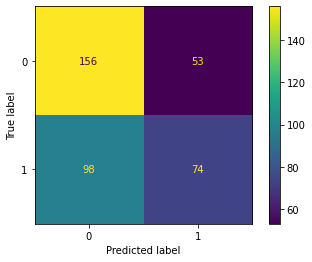

In [ ]:
y_pred_train = mlp_clf.predict(X_train_gene_std)
y_pred_test = mlp_clf.predict(X_test_gene_std)

print(f"Accuracy for Train: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Accuracy for Test: {accuracy_score(y_test, y_pred_test):.2f}")

plot_confusion_matrix(mlp_clf, X_test_gene_std, y_test, display_labels=mlp_clf.classes_)
plt.show()

#### 2. Simple MLP

In [ ]:
model = simple_mlp_model(X_train_gene_std)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 32)                15680     
                                                                 
 dense_76 (Dense)            (None, 1)                 33        
                                                                 
Total params: 15,713
Trainable params: 15,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_gene_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_gene_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 6ms/step - loss: 0.7978 - val_loss: 0.6712
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5779 - val_loss: 0.6452
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5007 - val_loss: 0.6467
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.4450 - val_loss: 0.6595
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.3970 - val_loss: 0.6917
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.3630 - val_loss: 0.6963
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3240 - val_loss: 0.7043
Epoch 8/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2834 - val_loss: 0.7393
Epoch 9/100
39/39 [==============================] - 0s 5ms/step - loss: 0.2536 - val_loss: 0.7586
Epoch 10/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2252 - val_loss: 0.7886
Epoch 11/

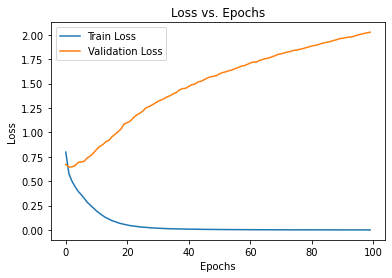

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_gene_std,
                X_test=X_test_gene_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.63


#### 3. Complex MLP

In [ ]:
model = complex_mlp_model(X_train_gene_std)
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 128)               62720     
                                                                 
 dense_78 (Dense)            (None, 64)                8256      
                                                                 
 dense_79 (Dense)            (None, 32)                2080      
                                                                 
 dense_80 (Dense)            (None, 16)                528       
                                                                 
 dense_81 (Dense)            (None, 4)                 68        
                                                                 
 dense_82 (Dense)            (None, 1)                 5         
                                                                 
Total params: 73,657
Trainable params: 73,657
Non-tra

In [ ]:
model.fit(X_train_gene_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_gene_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 8ms/step - loss: 0.6897 - val_loss: 0.6575
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5167 - val_loss: 0.7257
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 0.3811 - val_loss: 0.7937
Epoch 4/100
39/39 [==============================] - 0s 5ms/step - loss: 0.2613 - val_loss: 0.8890
Epoch 5/100
39/39 [==============================] - 0s 6ms/step - loss: 0.1483 - val_loss: 1.1572
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0621 - val_loss: 1.3274
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0315 - val_loss: 1.4763
Epoch 8/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 1.5770
Epoch 9/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 1.6660
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0064 - val_loss: 1.7711
Epoch 11/

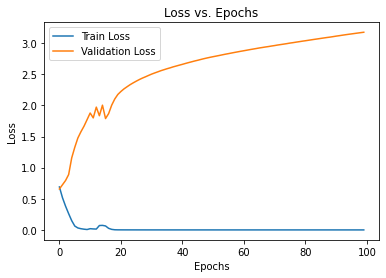

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_gene_std,
                X_test=X_test_gene_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 3ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.59


#### 4. Constrained MLP

In [ ]:
model = constrained_mlp_model(X_train_gene_std)
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 128)               62720     
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_84 (Dense)            (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_85 (Dense)            (None, 32)                2080      
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_86 (Dense)            (None, 16)              

In [ ]:
model.fit(X_train_gene_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_gene_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 9ms/step - loss: 0.7233 - val_loss: 0.6713
Epoch 2/100
39/39 [==============================] - 0s 6ms/step - loss: 0.6822 - val_loss: 0.6730
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6694 - val_loss: 0.6725
Epoch 4/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6516 - val_loss: 0.6545
Epoch 5/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6533 - val_loss: 0.6588
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6377 - val_loss: 0.6446
Epoch 7/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6355 - val_loss: 0.6475
Epoch 8/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6062 - val_loss: 0.6415
Epoch 9/100
39/39 [==============================] - 0s 5ms/step - loss: 0.5935 - val_loss: 0.6600
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 0.5666 - val_loss: 0.6462
Epoch 11/

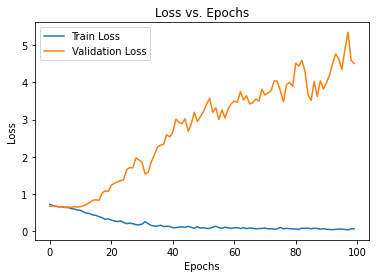

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_gene_std,
                X_test=X_test_gene_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.63


#### 5. Regularized MLP

In [ ]:
model = regularized_mlp_model(X_train_gene_std)
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 128)               62720     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_90 (Dense)            (None, 32)                4128      
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_91 (Dense)            (None, 8)                 264       
                                                                 
 dropout_31 (Dropout)        (None, 8)                 0         
                                                                 
 dense_92 (Dense)            (None, 1)               

In [ ]:
model.fit(X_train_gene_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_gene_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 9ms/step - loss: 4.0594 - val_loss: 3.7661
Epoch 2/100
39/39 [==============================] - 0s 5ms/step - loss: 3.5443 - val_loss: 3.3606
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 3.1088 - val_loss: 2.9642
Epoch 4/100
39/39 [==============================] - 0s 5ms/step - loss: 2.7119 - val_loss: 2.6157
Epoch 5/100
39/39 [==============================] - 0s 5ms/step - loss: 2.3828 - val_loss: 2.3261
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 2.0746 - val_loss: 2.0829
Epoch 7/100
39/39 [==============================] - 0s 6ms/step - loss: 1.8208 - val_loss: 1.8969
Epoch 8/100
39/39 [==============================] - 0s 5ms/step - loss: 1.6209 - val_loss: 1.7418
Epoch 9/100
39/39 [==============================] - 0s 4ms/step - loss: 1.4771 - val_loss: 1.6104
Epoch 10/100
39/39 [==============================] - 0s 4ms/step - loss: 1.3124 - val_loss: 1.5492
Epoch 11/

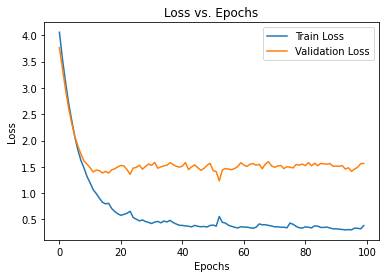

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_gene_std,
                X_test=X_test_gene_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 0.98
Accuracy for Test: 0.60


#### 6. Autoencoder

In [ ]:
input_dim = Input(shape=(X_train_gene_std.shape[1], ))
encoded = Dense(256, activation='relu')(input_dim)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(16)(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(X_train_gene_std.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_dim, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 489)]             0         
                                                                 
 dense_93 (Dense)            (None, 256)               125440    
                                                                 
 dense_94 (Dense)            (None, 64)                16448     
                                                                 
 dense_95 (Dense)            (None, 16)                1040      
                                                                 
 dense_96 (Dense)            (None, 64)                1088      
                                                                 
 dense_97 (Dense)            (None, 256)               16640     
                                                                 
 dense_98 (Dense)            (None, 489)               1256

In [ ]:
autoencoder.fit(X_train_gene_std, X_train_gene_std,
                epochs = 100,
                batch_size = 16,
                shuffle = True,
                validation_data = (X_val_gene_std, X_val_gene_std))

encoder = Model(input_dim, encoded)

Epoch 1/100
77/77 [==============================] - 1s 8ms/step - loss: 1.0305 - val_loss: 0.9866
Epoch 2/100
77/77 [==============================] - 0s 6ms/step - loss: 0.9915 - val_loss: 0.9797
Epoch 3/100
77/77 [==============================] - 1s 7ms/step - loss: 0.9642 - val_loss: 0.9275
Epoch 4/100
77/77 [==============================] - 0s 6ms/step - loss: 0.9040 - val_loss: 0.8918
Epoch 5/100
77/77 [==============================] - 0s 6ms/step - loss: 0.8740 - val_loss: 0.8735
Epoch 6/100
77/77 [==============================] - 0s 6ms/step - loss: 0.8557 - val_loss: 0.8622
Epoch 7/100
77/77 [==============================] - 0s 6ms/step - loss: 0.8429 - val_loss: 0.8550
Epoch 8/100
77/77 [==============================] - 0s 6ms/step - loss: 0.8319 - val_loss: 0.8505
Epoch 9/100
77/77 [==============================] - 0s 6ms/step - loss: 0.8232 - val_loss: 0.8461
Epoch 10/100
77/77 [==============================] - 0s 6ms/step - loss: 0.8159 - val_loss: 0.8432
Epoch 11/

In [ ]:
X_train_auto = encoder.predict(X_train_gene_std)
X_test_auto = encoder.predict(X_test_gene_std)

12/12 [==============================] - 0s 2ms/step


In [ ]:
auto_model = Sequential()

auto_model.add(Dense(1, input_dim=X_train_auto.shape[1], activation='sigmoid'))
auto_model.compile(loss='binary_crossentropy', optimizer='adam')
auto_model.fit(X_train_auto, y_train,
                epochs=100,
                batch_size = 32,
                shuffle = True)

Epoch 1/100
39/39 [==============================] - 0s 2ms/step - loss: 16.0342
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 14.7014
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 13.5299
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: 12.4198
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 11.4124
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 10.4705
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 9.5937
Epoch 8/100
39/39 [==============================] - 0s 2ms/step - loss: 8.8091
Epoch 9/100
39/39 [==============================] - 0s 2ms/step - loss: 8.0490
Epoch 10/100
39/39 [==============================] - 0s 2ms/step - loss: 7.3259
Epoch 11/100
39/39 [==============================] - 0s 2ms/step - loss: 6.6244
Epoch 12/100
39/39 [==============================] - 0s 2ms/step - loss: 5.9217
Epoch 13/100
39/39 [===========

In [ ]:
show_acc_result(model=auto_model,
                X_train=X_train_auto,
                X_test=X_test_auto,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 1ms/step
Accuracy for Train: 0.64
Accuracy for Test: 0.61


### Reduced Gene Expressions

In [ ]:
X_train_gene_red_std, X_val_gene_red_std, X_test_gene_red_std = std_scale(X_train=X_train_gene_red,
                                                                            X_val=X_val_gene_red,
                                                                            X_test=X_test_gene_red)

#### 1. MLPClassifier

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                        max_iter=300,
                        activation='relu',
                        solver='adam')

mlp_clf.fit(X_train_gene_red_std, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

Accuracy for Train: 1.00
Accuracy for Test: 0.58


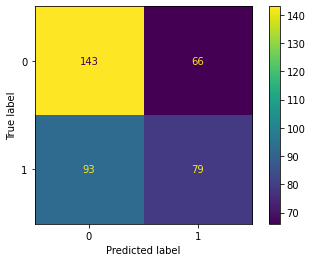

In [ ]:
y_pred_train = mlp_clf.predict(X_train_gene_red_std)
y_pred_test = mlp_clf.predict(X_test_gene_red_std)

print(f"Accuracy for Train: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Accuracy for Test: {accuracy_score(y_test, y_pred_test):.2f}")

plot_confusion_matrix(mlp_clf, X_test_gene_red_std, y_test, display_labels=mlp_clf.classes_)
plt.show()

#### 2. Simple MLP

In [ ]:
model = simple_mlp_model(X_train_gene_red_std)
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 32)                1824      
                                                                 
 dense_101 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_gene_red_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_gene_red_std, y_val))

Epoch 1/100
39/39 [==============================] - 3s 15ms/step - loss: 0.8032 - val_loss: 0.7555
Epoch 2/100
39/39 [==============================] - 0s 7ms/step - loss: 0.7058 - val_loss: 0.7080
Epoch 3/100
39/39 [==============================] - 0s 6ms/step - loss: 0.6520 - val_loss: 0.6837
Epoch 4/100
39/39 [==============================] - 0s 8ms/step - loss: 0.6197 - val_loss: 0.6680
Epoch 5/100
39/39 [==============================] - 0s 5ms/step - loss: 0.5974 - val_loss: 0.6601
Epoch 6/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5787 - val_loss: 0.6512
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5641 - val_loss: 0.6491
Epoch 8/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5544 - val_loss: 0.6458
Epoch 9/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5436 - val_loss: 0.6465
Epoch 10/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5359 - val_loss: 0.6488
Epoch 11

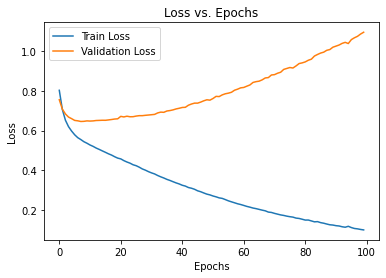

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_gene_red_std,
                X_test=X_test_gene_red_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.57


#### 3. Complex MLP

In [ ]:
model = complex_mlp_model(X_train_gene_red_std)
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 128)               7296      
                                                                 
 dense_103 (Dense)           (None, 64)                8256      
                                                                 
 dense_104 (Dense)           (None, 32)                2080      
                                                                 
 dense_105 (Dense)           (None, 16)                528       
                                                                 
 dense_106 (Dense)           (None, 4)                 68        
                                                                 
 dense_107 (Dense)           (None, 1)                 5         
                                                                 
Total params: 18,233
Trainable params: 18,233
Non-tra

In [ ]:
model.fit(X_train_gene_red_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_gene_red_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 7ms/step - loss: 0.7268 - val_loss: 0.6681
Epoch 2/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6566 - val_loss: 0.6591
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6133 - val_loss: 0.6466
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5603 - val_loss: 0.6404
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5067 - val_loss: 0.6449
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 0.4506 - val_loss: 0.6555
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3779 - val_loss: 0.6820
Epoch 8/100
39/39 [==============================] - 0s 5ms/step - loss: 0.3107 - val_loss: 0.7220
Epoch 9/100
39/39 [==============================] - 0s 5ms/step - loss: 0.2478 - val_loss: 0.7894
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 0.1973 - val_loss: 0.8321
Epoch 11/

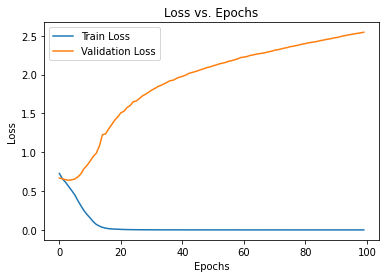

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_gene_red_std,
                X_test=X_test_gene_red_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.59


#### 4. Constrained MLP

In [ ]:
model = constrained_mlp_model(X_train_gene_red_std)
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 128)               7296      
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_109 (Dense)           (None, 64)                8256      
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_110 (Dense)           (None, 32)                2080      
                                                                 
 dropout_34 (Dropout)        (None, 32)                0         
                                                                 
 dense_111 (Dense)           (None, 16)              

In [ ]:
model.fit(X_train_gene_red_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_gene_red_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 9ms/step - loss: 0.7447 - val_loss: 0.6923
Epoch 2/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6955 - val_loss: 0.6877
Epoch 3/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6850 - val_loss: 0.6859
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6909 - val_loss: 0.6852
Epoch 5/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6905 - val_loss: 0.6843
Epoch 6/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6786 - val_loss: 0.6846
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6729 - val_loss: 0.6816
Epoch 8/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6721 - val_loss: 0.6832
Epoch 9/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6771 - val_loss: 0.6822
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 0.6688 - val_loss: 0.6789
Epoch 11/

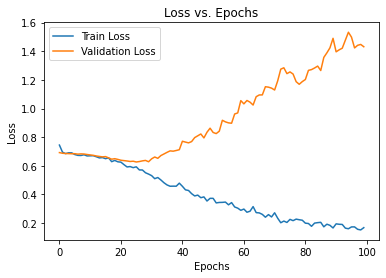

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_gene_red_std,
                X_test=X_test_gene_red_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.60


#### 5. Regularized MLP

In [ ]:
model = regularized_mlp_model(X_train_gene_red_std)
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 128)               7296      
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_115 (Dense)           (None, 32)                4128      
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                                                 
 dense_116 (Dense)           (None, 8)                 264       
                                                                 
 dropout_39 (Dropout)        (None, 8)                 0         
                                                                 
 dense_117 (Dense)           (None, 1)               

In [ ]:
model.fit(X_train_gene_red_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_gene_red_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 8ms/step - loss: 4.1084 - val_loss: 3.7349
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 3.5525 - val_loss: 3.3111
Epoch 3/100
39/39 [==============================] - 0s 4ms/step - loss: 3.1237 - val_loss: 2.9022
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 2.7264 - val_loss: 2.5293
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 2.3728 - val_loss: 2.2021
Epoch 6/100
39/39 [==============================] - 0s 6ms/step - loss: 2.0666 - val_loss: 1.9212
Epoch 7/100
39/39 [==============================] - 1s 24ms/step - loss: 1.8059 - val_loss: 1.6869
Epoch 8/100
39/39 [==============================] - 1s 26ms/step - loss: 1.5989 - val_loss: 1.4963
Epoch 9/100
39/39 [==============================] - 1s 17ms/step - loss: 1.4162 - val_loss: 1.3377
Epoch 10/100
39/39 [==============================] - 0s 8ms/step - loss: 1.2660 - val_loss: 1.2095
Epoch 

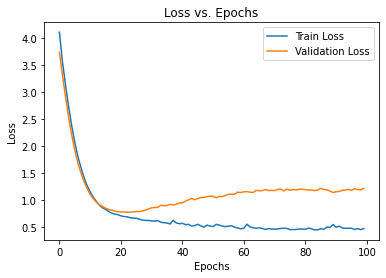

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_gene_red_std,
                X_test=X_test_gene_red_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 3ms/step
Accuracy for Train: 0.99
Accuracy for Test: 0.59


### All Data

In [ ]:
X_train_std, X_val_std, X_test_std = std_scale(X_train=X_train,
                                                X_val=X_val,
                                                X_test=X_test)

#### 1. MLPClassifier

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                        max_iter=300,
                        activation='relu',
                        solver='adam')

mlp_clf.fit(X_train_std, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

Accuracy for Train: 1.00
Accuracy for Test: 0.68


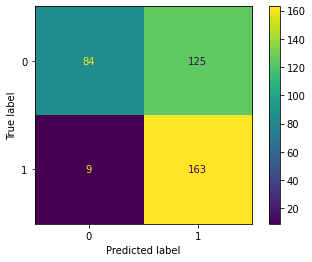

In [ ]:
y_pred_train = mlp_clf.predict(X_train_std)
y_pred_test = mlp_clf.predict(X_test_std)

print(f"Accuracy for Train: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Accuracy for Test: {accuracy_score(y_test, y_pred_test):.2f}")

plot_confusion_matrix(mlp_clf, X_test, y_test, display_labels=mlp_clf.classes_)
plt.show()

#### 2. Simple MLP

In [ ]:
model = simple_mlp_model(X_train=X_train_std)
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 32)                16576     
                                                                 
 dense_119 (Dense)           (None, 1)                 33        
                                                                 
Total params: 16,609
Trainable params: 16,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 6ms/step - loss: 0.7291 - val_loss: 0.6620
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5268 - val_loss: 0.6166
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.4416 - val_loss: 0.6013
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.3780 - val_loss: 0.5893
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.3221 - val_loss: 0.5939
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2748 - val_loss: 0.6022
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2343 - val_loss: 0.6085
Epoch 8/100
39/39 [==============================] - 0s 3ms/step - loss: 0.1965 - val_loss: 0.6149
Epoch 9/100
39/39 [==============================] - 0s 4ms/step - loss: 0.1666 - val_loss: 0.6225
Epoch 10/100
39/39 [==============================] - 0s 3ms/step - loss: 0.1381 - val_loss: 0.6545
Epoch 11/

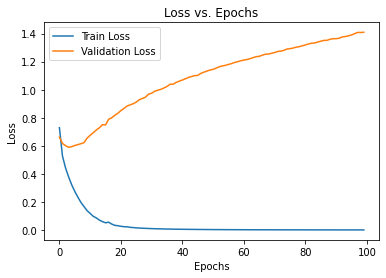

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_std,
                X_test=X_test_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.73


#### 3. Complex MLP

In [ ]:
model = complex_mlp_model(X_train=X_train_std)
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 128)               66304     
                                                                 
 dense_121 (Dense)           (None, 64)                8256      
                                                                 
 dense_122 (Dense)           (None, 32)                2080      
                                                                 
 dense_123 (Dense)           (None, 16)                528       
                                                                 
 dense_124 (Dense)           (None, 4)                 68        
                                                                 
 dense_125 (Dense)           (None, 1)                 5         
                                                                 
Total params: 77,241
Trainable params: 77,241
Non-tra

In [ ]:
model.fit(X_train_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 8ms/step - loss: 0.6940 - val_loss: 0.6554
Epoch 2/100
39/39 [==============================] - 0s 5ms/step - loss: 0.5224 - val_loss: 0.6705
Epoch 3/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3958 - val_loss: 0.6940
Epoch 4/100
39/39 [==============================] - 0s 5ms/step - loss: 0.2598 - val_loss: 0.7656
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 0.1762 - val_loss: 0.7987
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 0.1592 - val_loss: 0.9351
Epoch 7/100
39/39 [==============================] - 0s 5ms/step - loss: 0.1056 - val_loss: 0.9517
Epoch 8/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0855 - val_loss: 1.0649
Epoch 9/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0706 - val_loss: 1.1092
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0566 - val_loss: 1.1787
Epoch 11/

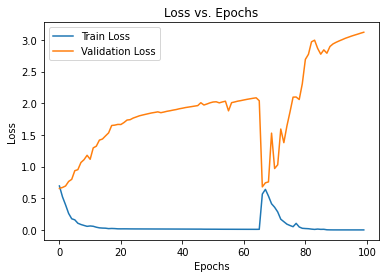

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_std,
                X_test=X_test_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.69


#### 4. Constrained MLP

In [ ]:
model = constrained_mlp_model(X_train=X_train_std)
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 128)               66304     
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_127 (Dense)           (None, 64)                8256      
                                                                 
 dropout_41 (Dropout)        (None, 64)                0         
                                                                 
 dense_128 (Dense)           (None, 32)                2080      
                                                                 
 dropout_42 (Dropout)        (None, 32)                0         
                                                                 
 dense_129 (Dense)           (None, 16)              

In [ ]:
model.fit(X_train_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_std, y_val))

Epoch 1/100
39/39 [==============================] - 1s 10ms/step - loss: 0.7811 - val_loss: 0.6709
Epoch 2/100
39/39 [==============================] - 0s 6ms/step - loss: 0.6835 - val_loss: 0.6651
Epoch 3/100
39/39 [==============================] - 0s 6ms/step - loss: 0.6878 - val_loss: 0.6704
Epoch 4/100
39/39 [==============================] - 0s 6ms/step - loss: 0.6719 - val_loss: 0.6703
Epoch 5/100
39/39 [==============================] - 0s 7ms/step - loss: 0.6486 - val_loss: 0.6532
Epoch 6/100
39/39 [==============================] - 0s 6ms/step - loss: 0.6418 - val_loss: 0.6439
Epoch 7/100
39/39 [==============================] - 0s 6ms/step - loss: 0.6332 - val_loss: 0.6328
Epoch 8/100
39/39 [==============================] - 0s 6ms/step - loss: 0.6338 - val_loss: 0.6308
Epoch 9/100
39/39 [==============================] - 0s 6ms/step - loss: 0.6079 - val_loss: 0.6231
Epoch 10/100
39/39 [==============================] - 0s 6ms/step - loss: 0.5752 - val_loss: 0.6040
Epoch 11

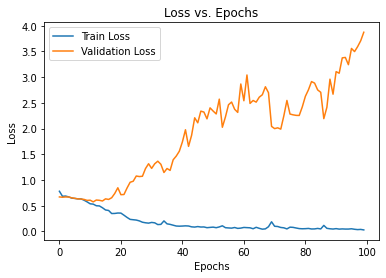

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_std,
                X_test=X_test_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 4ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.72


#### 5. Regularized MLP

In [ ]:
model = regularized_mlp_model(X_train=X_train_std)
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 128)               66304     
                                                                 
 dropout_45 (Dropout)        (None, 128)               0         
                                                                 
 dense_133 (Dense)           (None, 32)                4128      
                                                                 
 dropout_46 (Dropout)        (None, 32)                0         
                                                                 
 dense_134 (Dense)           (None, 8)                 264       
                                                                 
 dropout_47 (Dropout)        (None, 8)                 0         
                                                                 
 dense_135 (Dense)           (None, 1)               

In [ ]:
model.fit(X_train_std, y_train,
                epochs = 100,
                batch_size = 32,
                shuffle = True,
                validation_data = (X_val_std, y_val))

Epoch 1/100
39/39 [==============================] - 2s 12ms/step - loss: 3.8405 - val_loss: 3.4675
Epoch 2/100
39/39 [==============================] - 0s 6ms/step - loss: 3.1872 - val_loss: 2.9001
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 2.6400 - val_loss: 2.4224
Epoch 4/100
39/39 [==============================] - 0s 6ms/step - loss: 2.1677 - val_loss: 2.0471
Epoch 5/100
39/39 [==============================] - 0s 6ms/step - loss: 1.8342 - val_loss: 1.7637
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 1.5343 - val_loss: 1.5573
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 1.2988 - val_loss: 1.4277
Epoch 8/100
39/39 [==============================] - 0s 5ms/step - loss: 1.1180 - val_loss: 1.3209
Epoch 9/100
39/39 [==============================] - 0s 5ms/step - loss: 0.9821 - val_loss: 1.2587
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 0.9163 - val_loss: 1.2630
Epoch 11

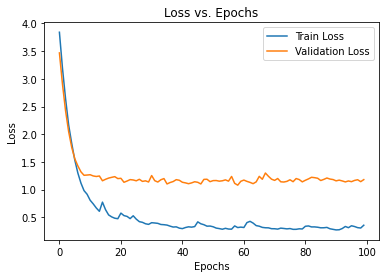

In [ ]:
show_loss_history(model)

In [ ]:
show_acc_result(model=model,
                X_train=X_train_std,
                X_test=X_test_std,
                y_train=y_train,
                y_test=y_test)

12/12 [==============================] - 0s 2ms/step
Accuracy for Train: 1.00
Accuracy for Test: 0.73


# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

#### Classic Models

In feature importance calculation we saw that clinical dataset is more representative in lower dimansions since its total information can be summarized in fewer components. In the other hand the gene dataset has almost equally important features, that's why dimension reduction on this dataset may not result in a significant improvement. As we can see in the calssical random forest model clinical dataset has the highest scores. This approves the fact that this dataset has the most informative features so that random forest splits can have a good performance on it. Gene expression dataset and reduced gene expressions have lower scores since they are generally less informative. Finally you can see that train accuracy is very high in classical model since these models are more prone to overfitting.

#### Neural Network Models

We implemented five different MLP architectures for clinical, gene expressions, and reduced gene expressions datasets including Simple MLP (using a single hidden layer),  Complex MLP (using multiple hidden layers), Constrained MLP (using multiple hidden layers with kernel constrains and dropout layers) and Regularized MLP (using multiple hidden layers with kernel constraints and kernel regularizations and dropout layers). We also used autoencoder for clinical and gene expressions datasets.

As can be seen in the accuracy results, MLPs without regularizations tend to result in high training accuracies and lower test accuracies, meaning that these models overfit to training data. On the other hand, regularized MLP model has both high training accuracy and high test accuracy.

Comparing accuracies for different datasets, we can see that models which are trained on clinical datasets have better performance over the models which are trained on gene expressions and reduced gene expressions.

At last we can see since most of the information is in the clinical data and this dataset is small and well structured, classical models work as good as neural networks. If we look at gene expression dataset, the conclusion is almost the same and classical models work nearly as well. This is because neural nets have the most benefit in massive unstructured datasets or in unsupervised learning and for such a tabular neat structured dataset we may stick to classical models. However, note that train accuracies are lower and closer to test accuracies in neural networks with regularization, which tells us they have more capacity that classical models and less prone to overfitting.